## Course 1 Getting Started with TensorFlow 2 - Week 2 The Sequential model API

***

#### 1.2.1 Building a Sequential model

In [1]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model_3 = Sequential([
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [3]:
model_1 = Sequential()

model_1.add(Dense(64, activation = 'relu', input_shape = (784,)))
model_1.add(Dense(10, activation = 'softmax'))

In [4]:
model_2 = Sequential([
    Flatten(input_shape = (28,28)),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [5]:
model = Sequential([
    Flatten(input_shape = (28,28)),
    Dense(16, activation = 'relu', name = 'layer_1'),
    Dense(16, activation = 'relu'),
    Dense(10, activation = 'softmax'),
    Dense(10)
])

In [6]:
model.weights

[<tf.Variable 'layer_1/kernel:0' shape=(784, 16) dtype=float32, numpy=
 array([[-0.01457074,  0.0460178 , -0.08074179, ..., -0.07817854,
          0.0512764 ,  0.03214617],
        [-0.07686979, -0.03356706,  0.04111144, ...,  0.06255139,
         -0.04266797, -0.06732611],
        [-0.07184032, -0.04906795, -0.06192636, ..., -0.08196469,
          0.02229265, -0.0290739 ],
        ...,
        [ 0.07180974,  0.0392807 ,  0.00146553, ..., -0.06008758,
         -0.03694945,  0.03449393],
        [ 0.03288601, -0.07512748,  0.01608882, ..., -0.05969619,
          0.00655745,  0.06713276],
        [ 0.05635542,  0.01056427, -0.06564092, ...,  0.04958375,
          0.03198898,  0.02750549]], dtype=float32)>,
 <tf.Variable 'layer_1/bias:0' shape=(16,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(16, 16) dtype=float32, numpy=
 array([[ 0.4263207 , -0.40647975,  0.28330907,  0.108

In [7]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 layer_1 (Dense)             (None, 16)                12560     
                                                                 
 dense_6 (Dense)             (None, 16)                272       
                                                                 
 dense_7 (Dense)             (None, 10)                170       
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
Total params: 13112 (51.22 KB)
Trainable params: 13112 (51.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 1.2.2 Convolutional neural networks

In [8]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [9]:
model = Sequential([
    Conv2D(16, kernel_size = 3, padding = 'SAME', activation = 'relu', input_shape = (32, 32, 3)),      # (None, 30, 30, 16)
    MaxPooling2D(pool_size=3),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(16, activation = 'softmax')
])

In [10]:
model_2 = Sequential([
    Conv2D(16, (3,3), activation = 'relu', input_shape = (28, 28, 1), data_format = 'channels_last'),
    MaxPooling2D(pool_size=3),
    Flatten(),
    Dense(10, activation = 'softmax')
])

In [11]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 16)        0         
 D)                                                              
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_9 (Dense)             (None, 64)                102464    
                                                                 
 dense_10 (Dense)            (None, 16)                1040      
                                                                 
Total params: 103952 (406.06 KB)
Trainable params: 103952 (406.06 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [12]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 16)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1024)              0         
                                                                 
 dense_11 (Dense)            (None, 10)                10250     
                                                                 
Total params: 10410 (40.66 KB)
Trainable params: 10410 (40.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 1.2.3 Weight Initialization

Default Weights and biases
In a Dense Layer, the biases are set to zero by default, while the weight are set according to `glorot_uniform`, the Glorot uniform initializer.
The Gloroto uniform initialiser draws the weights uniformly at random from the closed interval [-c, c], where  
$$ c = \sqrt{ \frac{6}{(n_{input} + n_{output})}}

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPooling1D 
import tensorflow as tf

In [14]:
model = Sequential([
    Conv1D(filters=16, kernel_size=3, input_shape=(128, 64), kernel_initializer='random_uniform', bias_initializer="zeros", activation='relu'),
    MaxPooling1D(pool_size=4),
    Flatten(),
    Dense(64, kernel_initializer='he_uniform', bias_initializer='ones', activation='relu'),
])
model.add(Dense(64, 
                kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                bias_initializer=tf.keras.initializers.Constant(value=0.4), 
                activation='relu'),)

model.add(Dense(8, 
                kernel_initializer=tf.keras.initializers.Orthogonal(gain=1.0, seed=None), 
                bias_initializer=tf.keras.initializers.Constant(value=0.4), 
                activation='relu'))

In [15]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 126, 16)           3088      
                                                                 
 max_pooling1d (MaxPooling1  (None, 31, 16)            0         
 D)                                                              
                                                                 
 flatten_4 (Flatten)         (None, 496)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                31808     
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 8)                 520       
                                                      

- Custom weight and bias initialisers

In [16]:
import tensorflow.keras.backend as K

In [17]:
def my_init(shape, dtype=None):
    return K.random_normal(shape, dtype=dtype)

model.add(Dense(64, kernel_initializer=my_init))

In [18]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 126, 16)           3088      
                                                                 
 max_pooling1d (MaxPooling1  (None, 31, 16)            0         
 D)                                                              
                                                                 
 flatten_4 (Flatten)         (None, 496)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                31808     
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 8)                 520       
                                                      

- Visualising the initialised weights and biases

In [19]:
import matplotlib.pyplot as plt

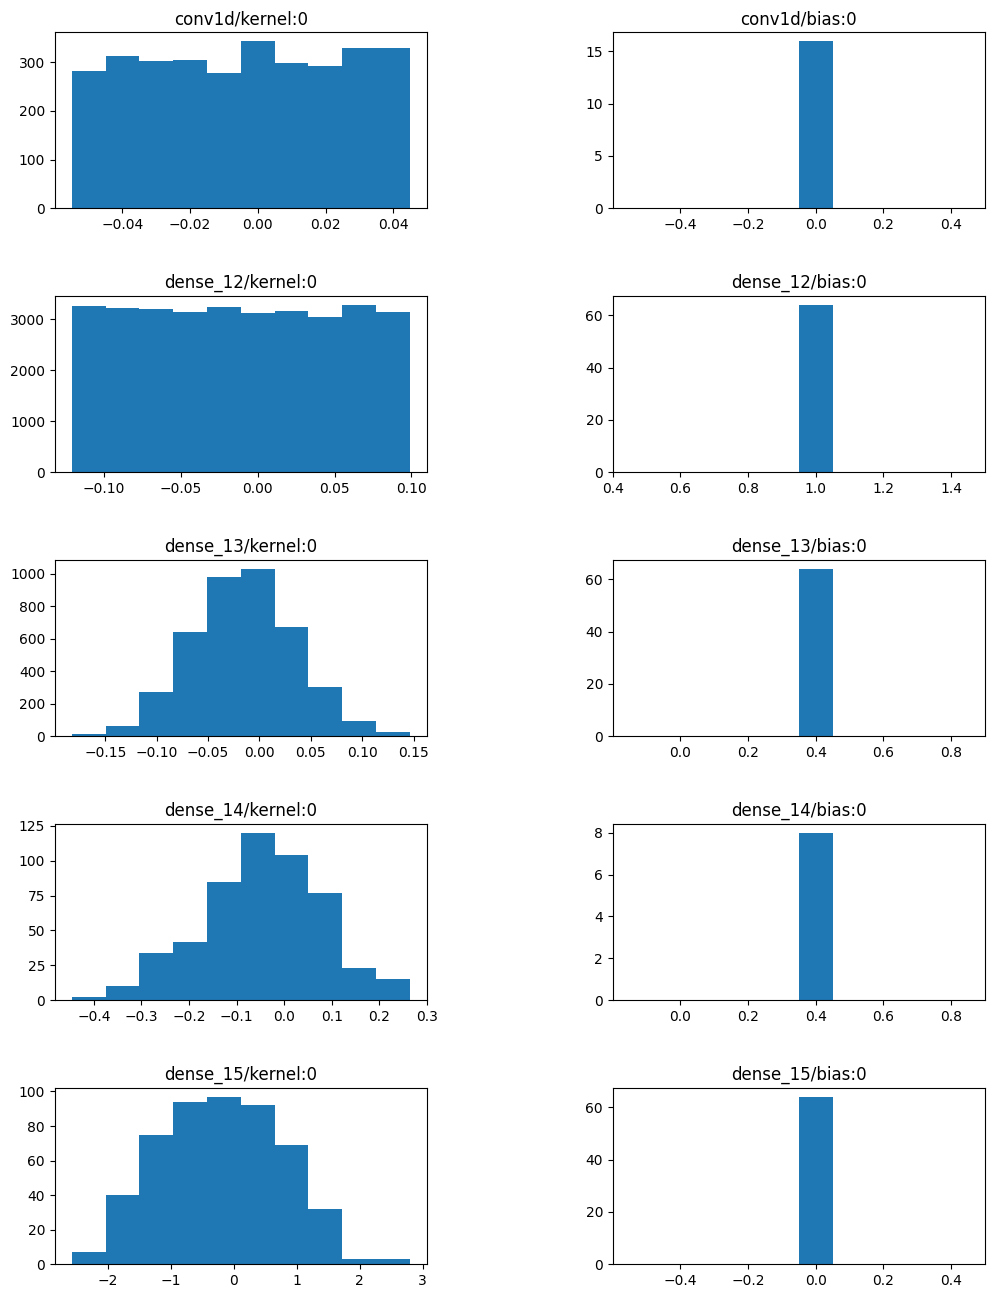

In [20]:
# Plot histograms of weight and bias values

fig, axes = plt.subplots(5, 2, figsize=(12,16))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Filter out the pooling and flatten layers, that don't have any weights
weight_layers = [layer for layer in model.layers if len(layer.weights) > 0]

for i, layer in enumerate(weight_layers):
    for j in [0, 1]:
        axes[i, j].hist(layer.weights[j].numpy().flatten(), align='left')
        axes[i, j].set_title(layer.weights[j].name)

#### 1.2.4 Compiling your model

- The compile method

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [22]:
model = Sequential([
    Dense(64, activation='elu', input_shape=(32,)),
    Dense(1, activation = 'sigmoid')
])

In [23]:
model.compile(
    optimizer= tf.keras.optimizers.SGD(learning_rate=0.001, momentum= 0.9, nesterov = True),
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics= [tf.keras.metrics.BinaryAccuracy(threshold=0.7), tf.keras.metrics.MeanAbsoluteError()]
)

- The Compile Method (Practice)

In [24]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy', 'mae']
)

In [25]:
print(model.loss)
print(model.optimizer)
print(model.metrics)
print(model.optimizer.lr)

categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


In [26]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(
    optimizer = opt,
    loss ='sparse_categorical_crossentropy',
    metrics = [acc, mae]
)

In [27]:
print(model.optimizer)
print(model.loss)
print(model.metrics)
print(model.optimizer.lr)

sparse_categorical_crossentropy
[]
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005>


#### 1.2.6 Optimizers, loss functions, and metrics

- Metrics in Keras

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import tensorflow.keras.backend as K
print(tf.__version__)

2.13.0


In [29]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(32, activation = 'relu'),
    Dense(32, activation = 'tanh'),
    Dense(10, activation = 'softmax')
])

In [30]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

    - Case 1 : Binary Classification with sigmoid activation function

In [31]:
y_true = tf.constant([0.0,1.0,1.0])
y_pred = tf.constant([0.4,0.8, 0.3])
accuracy = K.mean(K.equal(y_true, K.round(y_pred)))
accuracy

<tf.Tensor: shape=(), dtype=float32, numpy=0.6666667>

    - Case 2 :Categorical Classification

Now suppose we are training a model for a classification problem which should sort data into  𝑚>2
  different classes using a softmax activation function in the last layer.

Given a training example with input  𝑥(𝑖)
 , the model will output a tensor of probabilities  𝑝1,𝑝2,…𝑝𝑚
 , giving the likelihood (according to the model) that  𝑥(𝑖)
  falls into each class.

The accuracy metric works by determining the largest argument in the  𝑦(𝑖)𝑝𝑟𝑒𝑑
  tensor, and compares its index to the index of the maximum value of  𝑦(𝑖)𝑡𝑟𝑢𝑒
  to determine  𝛿(𝑦(𝑖)𝑝𝑟𝑒𝑑,𝑦(𝑖)𝑡𝑟𝑢𝑒)
 . It then computes the accuracy in the same way as for the binary classification case.

$$ accuracy = \frac{1}{N} \sum_{i=1}^N \delta(y_{pred}^{(i)},y_{true}^{(i)}) $$
 
In the backend of Keras, the accuracy metric is implemented slightly differently depending on whether we have a binary classification problem ( 𝑚=2
 ) or a categorical classifcation problem. Note that the accuracy for binary classification problems is the same, no matter if we use a sigmoid or softmax activation function to obtain the output.

In [32]:
y_true = tf.constant([[0.0,1.0],[1.0,0.0],[1.0,0.0],[0.0,1.0]])
y_pred = tf.constant([[0.4,0.6], [0.3,0.7], [0.05,0.95],[0.33,0.67]])
accuracy =K.mean(K.equal(y_true, K.round(y_pred)))
accuracy

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [33]:
y_true = tf.constant([[0.0,1.0,0.0,0.0],[1.0,0.0,0.0,0.0],[0.0,0.0,1.0,0.0]])
y_pred = tf.constant([[0.4,0.6,0.0,0.0], [0.3,0.2,0.1,0.4], [0.05,0.35,0.5,0.1]])
accuracy = K.mean(K.equal(K.argmax(y_true, axis=-1), K.argmax(y_pred, axis=-1)))
accuracy

<tf.Tensor: shape=(), dtype=float32, numpy=0.6666667>

- Other examples of metrics

    - Binary accuracy and categorical accuracy

The `binary_accuracy` and `categorical_accuracy` metrics are, by default, identical to the Case 1 and 2 respectively of the `accuracy` metric explained above. 

However, using `binary_accuracy` allows you to use the optional `threshold` argument, which sets the minimum value of $y_{pred}$ which will be rounded to 1. As mentioned above, it is set as `threshold=0.5` by default.

Below we give some examples of how to compile a model with `binary_accuracy` with and without a threshold.

In [34]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['binary_accuracy'] # metrics = [tf.keras.metrics.BinaryAccuracy(threshold = 0.5)]
)

    - Sparse categorical accuracy

In [35]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=["sparse_categorical_accuracy"])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

    - (Sparse) Top k-categorical accuracy

In [36]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=["top_k_categorical_accuracy"] # metrics = [tf.keras.metrics.SparseTopKCategoricalAccuracy(k=3)]
)

- Custom metrics

In [37]:
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=[mean_pred]
)

- Multiple metrics

In [38]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=[mean_pred, "accuracy",tf.keras.metrics.SparseTopKCategoricalAccuracy(k=3)]
)

#### 1.2.7 The fit method

In [39]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [40]:
# Load the Fashion-MNIST dataset
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [41]:
# Print the shape of the training data
train_images.shape

(60000, 28, 28)

In [42]:
# Define the labels
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(train_labels[0])

9


In [43]:
# Rescale the image values so that they lie in between 0 and 1

train_images = train_images / 255.
test_images = test_images / 255.

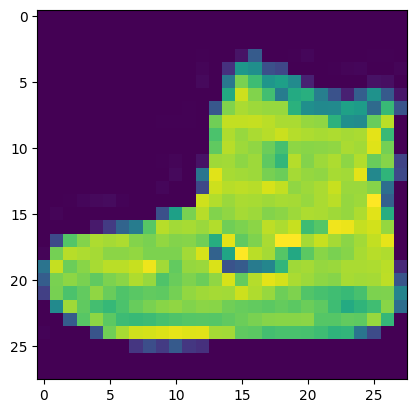

labels : Ankle boot


In [44]:
# Display one of the images
i = 0
img = train_images[0,:,:]
plt.imshow(img)
plt.show()
print(f"labels : {labels[train_labels[i]]}")

In [45]:
model = tf.keras.Sequential([
    Conv2D(16, kernel_size = 3, activation = 'relu', input_shape = (28,28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(50, activation = 'softmax'),
])

In [46]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy','mae'])

In [47]:
# Fit the model

history = model.fit(train_images[..., np.newaxis], train_labels, epochs=8, batch_size=100)

Epoch 1/8
600/600 [==============================] - 7s 11ms/step - loss: 0.5016 - accuracy: 0.8232 - mae: 4.4840
Epoch 2/8
600/600 [==============================] - 7s 11ms/step - loss: 0.3509 - accuracy: 0.8758 - mae: 4.4840
Epoch 3/8
600/600 [==============================] - 9s 14ms/step - loss: 0.3206 - accuracy: 0.8852 - mae: 4.4840
Epoch 4/8
600/600 [==============================] - 8s 13ms/step - loss: 0.3055 - accuracy: 0.8904 - mae: 4.4840
Epoch 5/8
600/600 [==============================] - 7s 12ms/step - loss: 0.2931 - accuracy: 0.8951 - mae: 4.4840
Epoch 6/8
600/600 [==============================] - 8s 13ms/step - loss: 0.2840 - accuracy: 0.8970 - mae: 4.4840
Epoch 7/8
600/600 [==============================] - 7s 12ms/step - loss: 0.2784 - accuracy: 0.8995 - mae: 4.4840
Epoch 8/8
600/600 [==============================] - 7s 12ms/step - loss: 0.2715 - accuracy: 0.9010 - mae: 4.4840


In [48]:
df = pd.DataFrame(history.history)
df.head()

,loss,accuracy,mae
0,0.501579,0.823167,4.483999
1,0.350861,0.875817,4.483998
2,0.320560,0.885183,4.483996
3,0.305549,0.890400,4.483997
4,0.293119,0.895133,4.483999


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

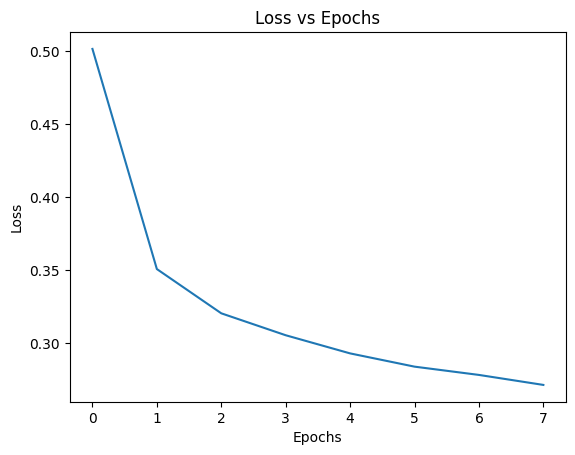

In [49]:
loss_plot = df.plot(y='loss', title= 'Loss vs Epochs', legend = False)
loss_plot.set(xlabel = 'Epochs', ylabel = 'Loss')

#### 1.2.8 Evaluation and prediction

In [50]:
import matplotlib.pyplot as plt
import numpy as np

In [51]:
# Evaluate the model

test_loss, test_accuracy, test_mae = model.evaluate(test_images[..., np.newaxis], test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3209 - accuracy: 0.8887 - mae: 4.4840


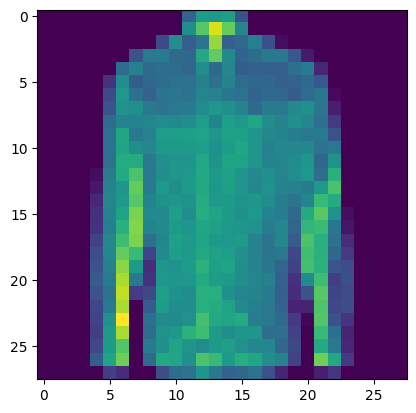

label: Shirt


In [52]:
# Make prediction from the model

random_inx = np.random.choice(test_images.shape[0])
inx = 30

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f'label: {labels[test_labels[random_inx]]}')

In [53]:
# Get the model predictions

predictions = model.predict(test_image[np.newaxis, ..., np.newaxis])
print(f'Model prediction : {labels[np.argmax(predictions)]}')

1/1 [==============================] - 0s 98ms/step
Model prediction : Shirt
